This notebook will go over some basic Dask tasks

First, we will need to start Dask

This will start Dask running on this compute node using all the available cores and memory

In [1]:
import dask
import dask.distributed
cluster = dask.distributed.LocalCluster()
client = dask.distributed.Client(cluster)
client

2022-10-24 23:25:55,353 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-day7w7dx', purging
2022-10-24 23:25:55,354 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ouhs35ad', purging
2022-10-24 23:25:55,354 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ggpy0878', purging
2022-10-24 23:25:55,354 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-y7i_m4z_', purging
2022-10-24 23:25:55,354 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-p3rj606o', purging
2022-10-24 23:25:55,354 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-06c7nzjh', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 36,Total memory: 188.60 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43658,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 36
Started: Just now,Total memory: 188.60 GiB
Comm: tcp://127.0.0.1:35125,Total threads: 6
Dashboard: http://127.0.0.1:34493/status,Memory: 31.43 GiB
Nanny: tcp://127.0.0.1:42514,


---

Lets first create a regular Numpy array with 3 random numbers

In [2]:
import numpy as np

np.random.seed(42)
num_data = []
for i in range(0,3):
    num_tmp = np.random.randint(1,100)
    num_data.append(num_tmp)
    
num_data

[52, 93, 15]

--- 

Create a simple function to square two numbers

In [3]:
def square_function(x):
    return x*x

---

We will now compute the sum of all the square's in the array

This is the "Numpy" way

In [4]:
square_sum = 0 
for i in num_data:
    square_sum += square_function(i)
                          
square_sum

11578

---

This uses Dask's delayed function

The value square_sum_dask is NOT yet computed 

The square_sum_dask variable is a delayed object that contains the tasks needed to compute the sum of squares.

In [5]:
from dask import delayed
square_sum_dask = 0 
for i in num_data:
    square_sum_dask += delayed(square_function)(i)
                          
square_sum_dask

Delayed('add-0f1aed65c764a9ce3f4154998cb0be2b')

The square_sum_dask is not computed until we request it by using the .compute() function

In [6]:
square_sum_dask.compute()

11578

We can visualize the tasks by the delayed object

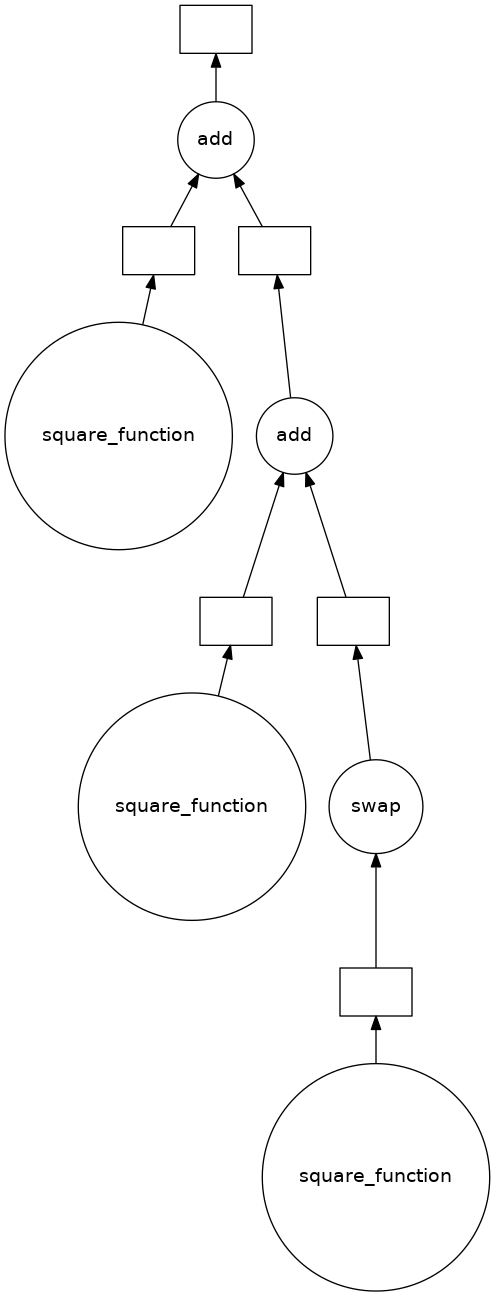

In [7]:
square_sum_dask.visualize()

---

Now lets do some tasks using Dask DataFrames

In [8]:
import dask.array as da

dask_array = da.random.random((10000,10000), chunks=(1000,1000))
dask_array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

We can do Pandas-like task and opertaions on these DataFrames

In [9]:
dask_array_new = dask_array * dask_array
dask_array_new

dask.array<mul, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

Remember, we will NOT see the values of this new array until we use .compute()

In [10]:
dask_array_new[0:3][0:3].compute()

array([[0.05719308, 0.01018488, 0.48722791, ..., 0.09671835, 0.06401902,
        0.16717382],
       [0.53182621, 0.16946831, 0.64172774, ..., 0.2528316 , 0.86624221,
        0.30152953],
       [0.08321638, 0.78913602, 0.54856009, ..., 0.16851885, 0.27201341,
        0.04589175]])

---

Lets compare the timing of using normal numpy (1 core) with a Dask array using all the cores on the node

In [11]:
%%time

np_array = np.ones((10000,10000))
print(np_array.sum())

100000000.0
CPU times: user 124 ms, sys: 162 ms, total: 286 ms
Wall time: 269 ms


In [12]:
%%time

dask_array = da.ones((10000,10000), chunks=(1000,1000))
print(dask_array.sum().compute())

100000000.0
CPU times: user 58.6 ms, sys: 13.7 ms, total: 72.3 ms
Wall time: 86.9 ms
